In [1]:
import pandas as pd

In [5]:
dataset = pd.read_csv('kc_house_data.csv', sep=',')

In [7]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


<IPython.core.display.Javascript object>


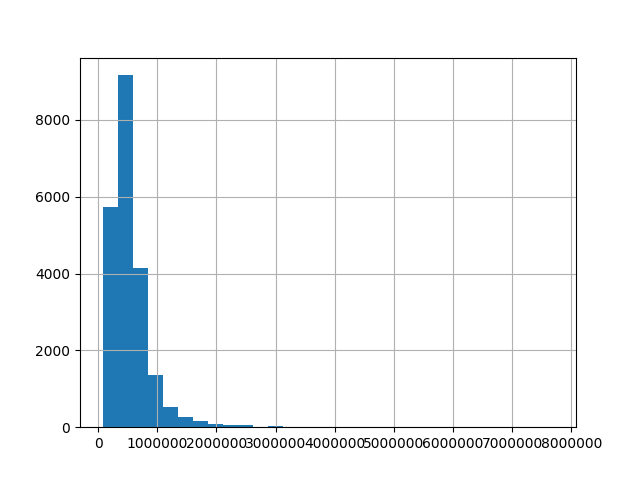

In [8]:
%matplotlib notebook
dataset['price'].hist(bins=30)

<IPython.core.display.Javascript object>


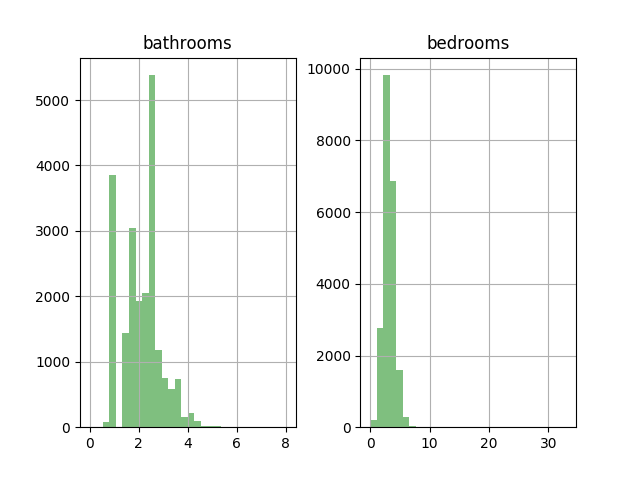

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c084c7048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c084baf28>]], dtype=object)

In [9]:
%matplotlib notebook
dataset[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='Green')

In [10]:
#E se quisermos saber qual o número médio de quartos têm os imóveis da base?
dataset['bedrooms'].mean()

3.3709102688694523

In [15]:
#E no caso do número máximo e mínimo de quartos? Ou seja, qual o maior valor da coluna bedrooms?
dataset['bedrooms'].max()
#dataset['bedrooms'].min()


33.0

In [16]:
# O método std() calcula o desvio padrão da coluna.
# O desvio padrão é uma medida interessante para ver a variabilidade dos dados. 
dataset['bedrooms'].std()

0.93008446794003685

Com o desvio padrão de 0.93 podemos dizer que nossos dados estão com uma variação de 0.93 para cima e para abaixo da média.

É interessante avaliar como está a distribuição dos nossos dados.

Para isso, existem métodos que medem se os dados estão simétricos.

O Pandas possui métodos para calcular a simetria dos dados veja o método skew():

In [17]:
dataset.skew()

id                0.243329
price             4.024069
bedrooms          1.974439
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616107
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

Esse método retorna o valor de simetria de cada coluna do dataset.

Um valor zero indica uma distribuição simétrica, um valor maior que zero ou menor indica uma distribuição assimétrica.

Podemos ver algumas informações interessantes, vejam que algumas colunas tem um valor muito acima de 0 e outras um pouco abaixo.

Valores acima de zero podemos dizer que existe uma assimetria positiva e valores abaixo de zero uma assimetria negativa.

Isso quer dizer que valores muito acima de zero indicam que existem mais valores acima da média e valores abaixo de zero significa que contém mais valores abaixo da média.

Se quiser várias medidas juntas use o comando describe().

Já falei desse método antes, mas nunca é demais, ele é extremamente útil.

Nesse exemplo usamos o describe em uma coluna:

In [19]:
dataset['bedrooms'].describe()

count    21609.000000
mean         3.370910
std          0.930084
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

<IPython.core.display.Javascript object>


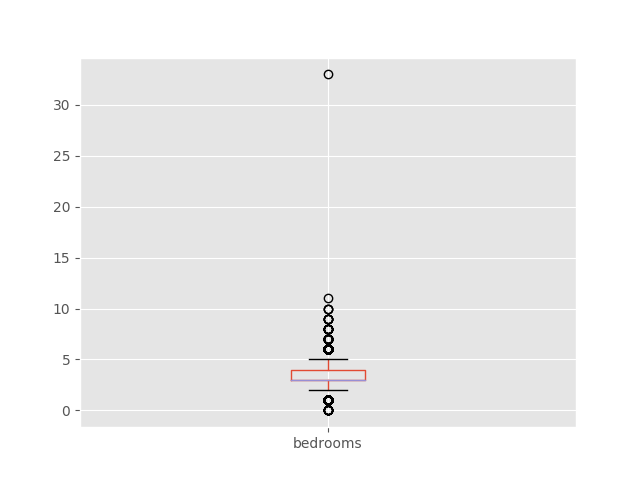

In [21]:
#O Pandas nos permite de forma rápida e fácil plotar um gráfico do tipo BoxPlot.
#Esse gráfico nos mostra diversas informações relevantes, veja:
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')
dataset.boxplot(column='bedrooms')


No código acima plotamos o gráfico de Box para a coluna ‘bedrooms’.

O que esse gráfico nos mostra?           Dominando o Pandas

Esse gráfico mostra várias informações relevantes, como: o valor médio dos dados, o valor máximo e mínimo do conjunto de dados e os outliers.

As linhas superior e inferior extra ao retângulo representam o valor máximo e mínimo dos dados.

Os pontos fora das linhas superior e inferior são chamados de outliers, pois, se distanciam da média dos valores.

Podemos ver um ponto que se distancia bastante, este seria um outlier, veja:

Com o BoxPlot conseguimos visualizar de forma rápida a distribuição dos dados através da dimensão do retângulo e visualizar os outliers representadas pelos valores pontos distantes.

Obs: A linha matplotlib.style.use(‘ggplot’) usei para mudar o estilo do gráfico. Isso apenas muda o layout do gráfico, mudando as cores e o fundo.

Se quiser conhecer os estilos disponíveis use o comando: matplotlib.style.available.

Podemos também plotar um gráfico do tipo Box de uma coluna agrupado por outra coluna, veja:

%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

<IPython.core.display.Javascript object>


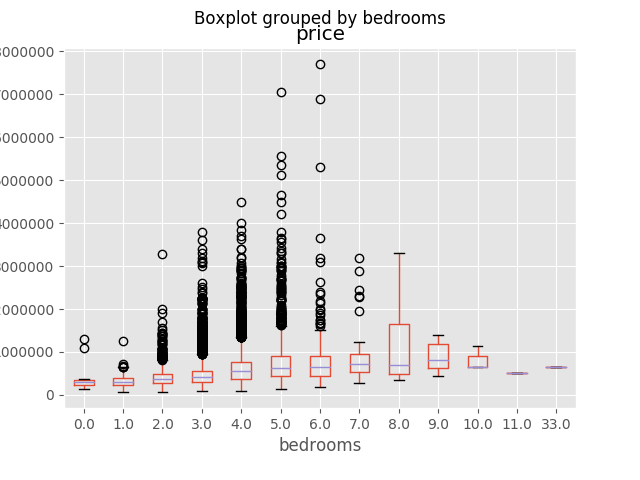

/usr/lib64/python3.5/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


In [22]:
%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

No comando acima plotamos a coluna ‘bedrooms’ agrupada pela coluna ‘price’.

Dessa forma podemos ver os imóveis pela quantidade de quartos e seus preços.

Correlação de Variáveis

Outro recurso interessante para fazer análise de dados é visualizar a correlação entre as variáveis. Dominando o Pandas

Será que existe uma correlação entre o número de banheiros do imóvel e o seu preço?

Ou, o número de quartos e o preço? Dominando o Pandas

Veja que com o método corr() do pandas podemos calcular a correlação entre todas as colunas do dataset.

In [23]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001235,0.005160,-0.012258,-0.132109,0.018595,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308321,0.525138,0.702035,0.089661,0.256791,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001235,0.308321,1.000000,0.515929,0.576679,0.031684,0.175440,-0.006589,0.079515,0.028534,0.356972,0.477618,0.303078,0.154197,0.018827,-0.152706,-0.008963,0.129498,0.391670,0.029221
bathrooms,0.005160,0.525138,0.515929,1.000000,0.754665,0.087740,0.500626,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576679,0.754665,1.000000,0.172826,0.353922,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031684,0.087740,0.172826,1.000000,-0.005210,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018595,0.256791,0.175440,0.500626,0.353922,-0.005210,1.000000,0.023695,0.029432,-0.263740,0.458171,0.523863,-0.245708,0.489298,0.006330,-0.059093,0.049656,0.125399,0.279856,-0.011280
waterfront,-0.002721,0.266369,-0.006589,0.063744,0.103818,0.021604,0.023695,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079515,0.187737,0.284611,0.074710,0.029432,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028534,-0.124982,-0.058753,-0.008958,-0.263740,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


A correlação que o pandas implementa por padrão é a correlação de Pearson.

Este coeficiente assume valores entre -1 e 1, onde um valor 1 significa uma correlação positiva perfeita entre as variáveis e um valor -1 uma correlação negativa perfeita entre as variáveis.

Os valores 0 significa que não há uma correlação entre as variáveis. Dominando o Pandas

Podemos implementar também a correlação de Spearman. A diferença aqui é que essa calcula a correlação não linear entre as variáveis.

Para usar passe o parâmetro para o método corr():

In [25]:
dataset.corr('spearman')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004178,0.006185,0.015051,0.001656,-0.116792,0.018905,-0.003573,0.012552,-0.023969,0.019835,0.003523,0.001408,0.026537,-0.017473,-0.005359,-0.003732,0.007413,-0.000035,-0.114735
price,0.004178,1.000000,0.344615,0.497160,0.644191,0.074939,0.322359,0.115089,0.293931,0.018490,0.658215,0.541752,0.251704,0.102038,0.101876,-0.008735,0.456409,0.063537,0.572290,0.062766
bedrooms,0.006185,0.344615,1.000000,0.521451,0.647395,0.216479,0.227565,-0.007604,0.081405,0.012748,0.380555,0.539755,0.230484,0.180037,0.016863,-0.167202,-0.021236,0.191430,0.443878,0.201530
bathrooms,0.015051,0.497160,0.521451,1.000000,0.745526,0.068805,0.546776,0.049522,0.155549,-0.162891,0.658194,0.691006,0.191848,0.566982,0.042688,-0.204783,0.008283,0.261539,0.570304,0.063111
sqft_living,0.001656,0.644191,0.647395,0.745526,1.000000,0.304159,0.401232,0.070326,0.232994,-0.062638,0.716400,0.843504,0.327878,0.352421,0.052679,-0.206848,0.030980,0.284584,0.746982,0.283864
sqft_lot,-0.116792,0.074939,0.216479,0.068805,0.304159,1.000000,-0.234460,0.085601,0.117033,0.114724,0.152049,0.272408,0.036624,-0.037569,0.008536,-0.319494,-0.122052,0.370551,0.359572,0.922316
floors,0.018905,0.322359,0.227565,0.546776,0.401232,-0.234460,1.000000,0.023876,0.019641,-0.287878,0.501672,0.599258,-0.272436,0.551660,0.012570,-0.061427,0.024616,0.148640,0.305398,-0.231411
waterfront,-0.003573,0.115089,-0.007604,0.049522,0.070326,0.085601,0.023876,1.000000,0.284924,0.016744,0.062189,0.054490,0.051969,-0.028605,0.091649,0.029591,-0.019044,-0.038139,0.074564,0.092271
view,0.012552,0.293931,0.081405,0.155549,0.232994,0.117033,0.019641,0.284924,1.000000,0.046000,0.217044,0.144394,0.236525,-0.066607,0.096539,0.078215,-0.000073,-0.102728,0.255793,0.116520
condition,-0.023969,0.018490,0.012748,-0.162891,-0.062638,0.114724,-0.287878,0.016744,0.046000,1.000000,-0.167374,-0.158126,0.161623,-0.393816,-0.066180,-0.022416,-0.022341,-0.085270,-0.086905,0.117719


Repare que as colunas ‘sqft_living’ , e ‘grade’ tiveram uma correlação positiva com a variável ‘price’.

Já a coluna ‘waterfront’ teve uma baixa correlação. Dominando o Pandas

O que essas colunas significam?

    sqft_living : Quantidade de metros quadrados do interior do imóvel.
    waterfront: Imóvel tem vista para o mar ou não.
    grade: Um índice de qualidade do design e construção do imóvel, onde valores mais altos significam imóveis com qualidade de construção superior.

Interessante aqui é que se o imóvel tem uma vista para o mar, isso não tem tanta correlação com o preço. 🙂

<IPython.core.display.Javascript object>


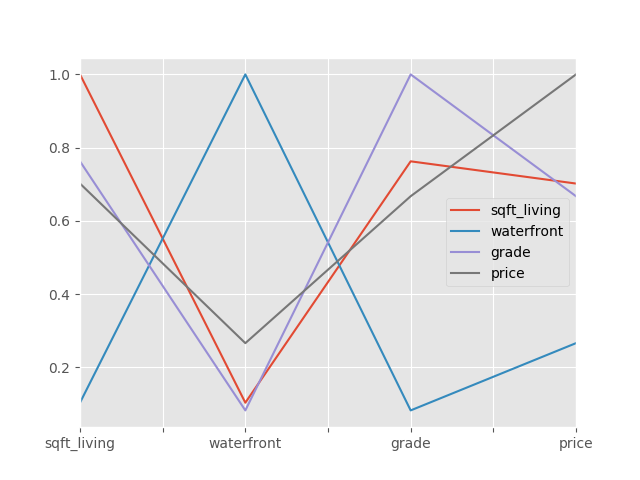

In [26]:
#Uma imagem vale mais que mil palavras. Vamos plotar essas correlações.

%matplotlib notebook
dataset[['sqft_living','waterfront','grade','price']].corr().plot()

É possível ver a relação das linhas com a variável ‘price’.

Veja que a linha verde (grade) e azul (sqft_living) quando próximas a variável ‘price’ se mantém acima de 0.6 enquanto a linha laranja (waterfront) se mantém bem abaixo.

Para plotar correlação existem outras bibliotecas que nos dão uma visão bem melhor, como a seaborn.  Porém, para uma rápida visualização o pandas já atende bem.

Tabelas Pivot

As tabelas pivot são úteis para fazer agrupamentos nos dados. Dominando o Pandas

Essa funcionalidade é bastante eficiente e nos dar uma enorme vantagem em termos de tempo e desempenho computacional.

Imagine fazer agrupamento de bases de dados muito grande na mão?

Por exemplo, se quisermos contar a quantidade de imóveis agrupados pelos que têm e não tem visão para o mar e ainda pelo número de andares?

In [27]:
dataset.pivot_table('id',index=["waterfront","floors"],aggfunc='count',margins=True)

id
waterfront floors         
0          1.0     10622.0
           1.5      1889.0
           2.0      8166.0
           2.5       159.0
           3.0       605.0
           3.5         8.0
1          1.0        57.0
           1.5        21.0
           2.0        75.0
           2.5         2.0
           3.0         8.0
All                21612.0

Com esse sumário dos dados ficou claro que a grande maioria dos imóveis não tem visão para o mar e são imóveis de 1 e 2 andares. 😉

O método pivot_table() recebe o primeiro parâmetro “id” que a coluna será o resultado da contagem dos dados agrupados.

O parâmetro “index” são as colunas que quero agrupar.

O parâmetro “aggfunc” uso para definir a função de agregação, no meu caso fiz a contagem dos dados, mas é possível fazer soma, calcular a média entre outras operações.

E por fim, o último parâmetro “margins” definido como “true” para imprimir o total de registros na última linha.

Crosstab, Wtf??

Na tradução livre essa funcionalidade seria chamada Tabulação Cruzada. Dominando o Pandas

Esse recurso é bem interessante, principalmente quando temos uma variável resposta ou classe.

Basicamente o que essa funcionalidade faz é cruzar os valores das variáveis.

Veja como o Pandas implementa:

Queremos cruzar as colunas ‘bedrooms’ e ‘condition’ veja:

In [29]:
pd.crosstab(dataset['bedrooms'],dataset['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,717,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


O código acima é bem simples, apenas passei as colunas ‘bedrooms’ e ‘condition’ como parâmetros para o método crosstab()

A coluna ‘condition’ significa um índice entre 1 a 5 da condição do imóvel.

Com o cruzamento dessas colunas, podemos ver por exemplo, qual a distribuição dos imóveis por número de quartos (bedrooms) com relação suas condições (condition).

Analisando a tabela acima vemos que o maior número de imóveis na condição 5 são os imóveis que possuem 3 quartos.

<IPython.core.display.Javascript object>


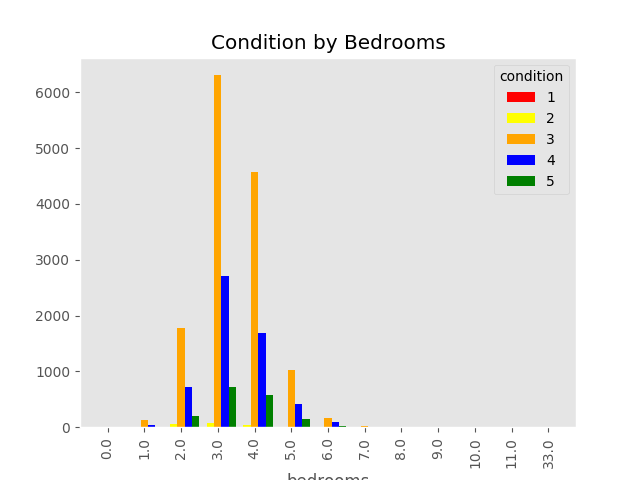

In [30]:
#Agora vamos visualizar esses dados em um gráfico:
table = pd.crosstab(dataset['bedrooms'],dataset['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condition by Bedrooms' ,grid=False)

O código acima é bem simples, para simplificar coloquei dentro do objeto ‘table’ a tabulação cruzada.

Em seguida, chamei o método plot passando o parâmetro “kind” com o valor ‘bar’ para informar que é um gráfico de barras.

O parâmetro ‘width’ define a largura das barras, o parâmetro ‘color’ recebe uma lista com as legendas e cores dos valores do eixo x (barras).

Em seguida usei o parâmetro ‘title’ para definir um título superior para o gráfico e por fim o parâmetro ‘grid’ igual a False para remover as linhas do fundo do gráfico.

#----------------

Trabalhando com Excel

pandas-excel Dominando o Pandas

Não poderíamos deixar de falar do nosso queridíssimo Excel.

Mas o que isso tem haver com Pandas ?

O fato é que o Pandas interage muito bem com esse cara e isso para nós é ótimo, concorda?

Veja o quanto isso pode ser interessante, existem muitas organizações que trabalham ativamente com Excel, então não se assuste se um dia ter que importar dados das planilhas mágicas 🙂

Chega de conversinha, vamos ao que importa.

Como ler uma carregar uma planilha do Excel ? simples, use o método read_excel().

Esse método permite ler uma planilha do disco, dessa forma criamos um Dataframe do pandas, veja:

dataframe_excel = pd.read_excel('/home/rodrigo/Downloads/Controle-de-Atividades-2.0.xlsx', sheetname=0, header=1)

Se você quiser fazer download da planilha que usei aqui está.

O método read_excel recebe no primeiro parâmetro o nome do arquivo, o parâmetro “sheetname” informo que quero carregar a primeira aba da planilha. Doinando o Pandas

O parâmetro header recebe o número da linha na qual será o cabeçalho da planilha, ou seja, aqui informamos em qual linha o pandas deve encontrar nossas colunas.

Como na primeira linha da planilha temos um título, disse ao pandas que o cabeçalho está na segunda linha, linha 1, pois, o número de linhas inicia com 0.

Veja a planilha:

planilha_pandas Dominando o Pandas

Vejamos o dataframe gerado:

dataframe_excel.head()

dataframe_excel Dominando o Pandas

O pandas carregou a planilha corretamente, apenas a linha 0 após o cabeçalho está vazia.

Isso aconteceu pois, as linhas do cabeçalho são duplas (estão mescladas).

Essa é uma planilha simples, mas já dá pra mostrar o poder desse método.
Indexando o Dataset

Outro parâmetro interessante é o index_col().

Com esse parâmetro podemos informar qual a coluna que será usada para indexar o Dataframe, veja um exemplo:

Vou indexar o Dataframe pela coluna “Estado Atual”, assim posso ordenar os resultados pelo estado atual de cada tarefa:

file = '/home/rodrigo/Downloads/Controle-de-Atividades-2.0.xlsx'
dataframe_excel = pd.read_excel(file, sheetname=0, header=1, index_col=3)

dataframe_excel.head()

dataframe_indexcol Dominando o Pandas

O parâmetro index_col recebe o número da coluna que queremos indexar, nesse caso quero a coluna “Estado Atual” na posição 3 (as posições das colunas iniciam com 0).

Com o Dataframe indexado pela coluna “Estado Atual” vou ordená-lo:

dataframe_excel.sort_index()

dataframe_excel_sort_index Dominando o Pandas

 
Gerando planilhas

Além de ler uma planilha do Excel o Pandas tem o método to_excel() responsável por gerar um arquivo do tipo xlsx. Dominando o Pandas

Vamos gerar um arquivo a partir do Dataframe que já estávamos trabalhando.

Vou selecionar algumas colunas para ficar mais simples a visualização e gerar uma planilha menor, veja.

colunas=['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
dataset[colunas].head()

Dataframe_to_excel Dominando o Pandas

Ok, agora é só chamar o método to_excel para escrever para o disco o arquivo:

dataset[colunas].to_excel('planilha_pandas.xls',index=False)

Veja uma imagem do arquivo gerado:

planilha_gerada_to_excel Dominando o Pandas

Como não passei a localização do arquivo, o pandas gerou no diretório padrão onde se encontra os notebooks.

Pronto a planilha foi criada com sucesso 🙂

Consegue perceber o poder dessa funcionalidade?

Sem dúvidas são recursos de extrema importância e que nos da muita produtividade em nossos projetos de Data Science.